## Some examples of using SARBA-Net on the WHU-OPT-SAR dataset

In [19]:
import numpy as np
from PIL import Image 
import cv2
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from PIL import Image 
import os

img_path = 'image'
lbl_path = 'label'
baseline_path = 'baseline'
sarba_path = 'sarba'

# difference_color
color_map = {
    0: (0, 0, 0),    # black
    100: (40, 120, 181),    # blue
    200: (200, 36, 35),    # red
    255: (255, 255, 255)   # white
}
# label_color
color_map2 = {
    0: (0, 0, 0),    # black
    50: (221, 135, 121),    # city
    100: (42, 157, 140),    # rural
    150: (186, 200, 200)   # road
}


def get_diff(lbl, model_pred):
    # 4 gray
    model_diff = np.zeros_like(lbl)
    model_diff[(lbl == 0) & (model_pred == 0)] = 0
    model_diff[(lbl == 255) & (model_pred == 0)] = 100    # omission
    model_diff[(lbl == 0) & (model_pred == 255)] = 200    # commission
    model_diff[(lbl == 255) & (model_pred == 255)] = 255
    return model_diff

def gray_to_color(model_diff, color_map):
    h, w = model_diff.shape
    color_image = np.zeros((h, w, 3), dtype=np.uint8)
    for gray_val, color in color_map.items():
        color_image[model_diff == gray_val] = color
    return color_image

def visualize(name):
    img = Image.open(os.path.join(img_path, f'{name}.tif'))
    lbl = Image.open(os.path.join(lbl_path, f'{name}.tif'))
    baseline = Image.open(os.path.join(baseline_path, f'{name}.jpg'))
    sarba = Image.open(os.path.join(sarba_path, f'{name}.jpg'))

    # to array and prepross
    img = np.array(img)
    lbl = np.array(lbl)
    binary_lbl = np.where(lbl > 0, 255, 0)
    lbl = gray_to_color(lbl, color_map2)    # label color visual
    baseline = np.where(np.array(baseline) >= 128, 255, 0)
    sarba = np.where(np.array(sarba) >= 128, 255, 0)

    # generate difference
    baseline_diff = get_diff(binary_lbl, baseline)
    sarba_diff = get_diff(binary_lbl, sarba)

    baseline_color = gray_to_color(baseline_diff, color_map)
    sarba_color = gray_to_color(sarba_diff, color_map)
    
    # visual
    plt.figure(figsize=(16, 3))

    plt.subplot(161)
    plt.title('Image')
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    plt.subplot(162)
    plt.title('Label')
    plt.imshow(lbl, cmap='gray')
    plt.axis('off')

    plt.subplot(163)
    plt.title('Baseline')
    plt.imshow(baseline, cmap='gray')
    plt.axis('off')

    plt.subplot(164)
    plt.title('Baseline Difference')
    plt.imshow(baseline_color)
    plt.axis('off')

    plt.subplot(165)
    plt.title('SARBA')
    plt.imshow(sarba, cmap='gray')
    plt.axis('off')

    plt.subplot(166)
    plt.title('SARBA Difference')
    plt.imshow(sarba_color)
    plt.axis('off')

    plt.suptitle(name)



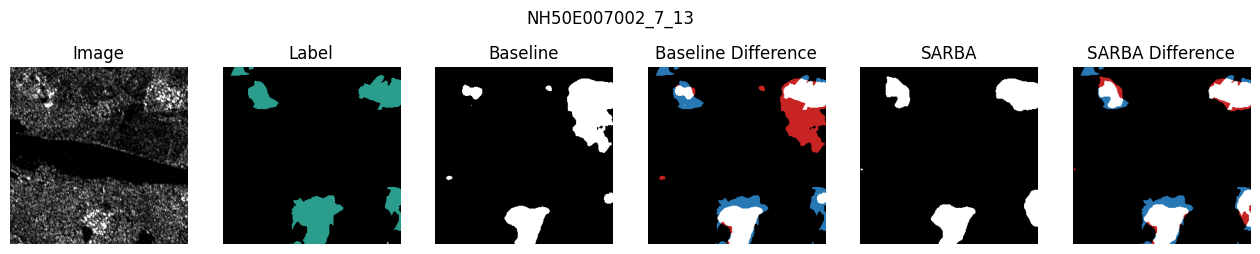

In [22]:
name = 'NH50E007002_7_13'
visualize(name)

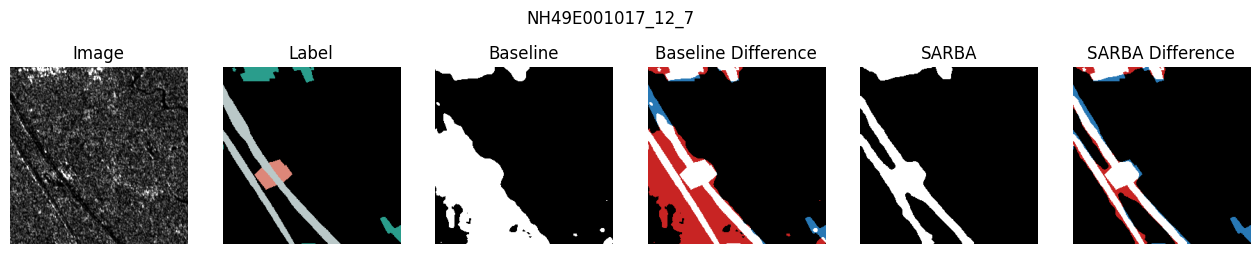

In [20]:
name = 'NH49E001017_12_7'
visualize(name)

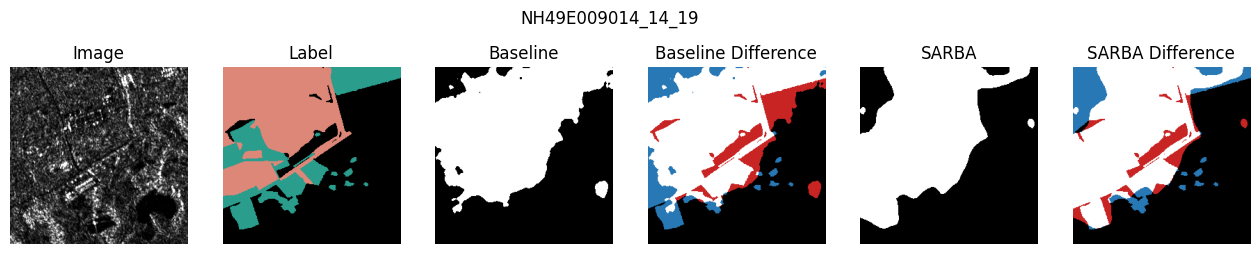

In [21]:
name = 'NH49E009014_14_19'
visualize(name)

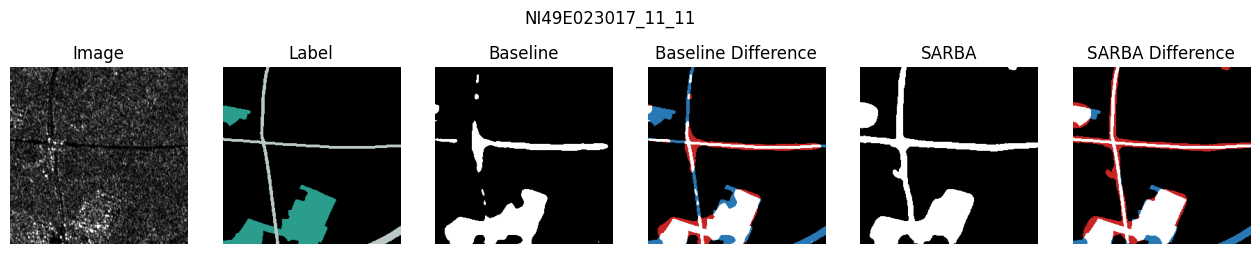

In [23]:
name = 'NI49E023017_11_11'
visualize(name)